# Uber New York City Data Analysis

Throughout this notebook, various questions regarding the Uber pickup-trends in and around New York have been answered which can be used to gain insights into the customer behaviour and demands and subsequently make changes to their business model accordingly to serve them better.

In the analysis, some of the questions that have been answered are given below:

-Which day of the week witnesses maximum rush for pickups ?

-Daywise analysis of active vehicles vs trips to observe the productivity.

-Which base number vehicles did the trips in top 3 rush weekdays?

-Analysis of the day having maximum number of trips.

-What is the demand versus supply chart of uber pickups in NYC?

# Importing  the data

In [160]:
import os 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [161]:
os.chdir('C:\\Users\\LENOVO\\Downloads')
os.getcwd()

'C:\\Users\\LENOVO\\Downloads'

In [162]:
df=pd.read_csv('Uber-Jan-Feb-DATA.csv')
df

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [163]:
df.shape

(354, 4)

# Checking Null Values

In [164]:
df.isna().sum()

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64

# DATA PREPROCESSING

In [166]:
df['date']=pd.to_datetime(df['date'])
df

,dispatching_base_number,date,active_vehicles,trips
0,B02512,2015-01-01,190,1132
1,B02765,2015-01-01,225,1765
2,B02764,2015-01-01,3427,29421
3,B02682,2015-01-01,945,7679
4,B02617,2015-01-01,1228,9537
...,...,...,...,...
349,B02764,2015-02-28,3952,39812
350,B02617,2015-02-28,1372,14022
351,B02682,2015-02-28,1386,14472
352,B02512,2015-02-28,230,1803


In [167]:
df.dtypes

dispatching_base_number            object
date                       datetime64[ns]
active_vehicles                     int64
trips                               int64
dtype: object

In [168]:

df['month']=df['date'].dt.month
df['weekday']=df['date'].dt.day_name()
df

,dispatching_base_number,date,active_vehicles,trips,month,weekday
0,B02512,2015-01-01,190,1132,1,Thursday
1,B02765,2015-01-01,225,1765,1,Thursday
2,B02764,2015-01-01,3427,29421,1,Thursday
3,B02682,2015-01-01,945,7679,1,Thursday
4,B02617,2015-01-01,1228,9537,1,Thursday
...,...,...,...,...,...,...
349,B02764,2015-02-28,3952,39812,2,Saturday
350,B02617,2015-02-28,1372,14022,2,Saturday
351,B02682,2015-02-28,1386,14472,2,Saturday
352,B02512,2015-02-28,230,1803,2,Saturday


In [169]:
df.duplicated().sum()

0

# ANALYSIS OF UBER TRIPS 

In [171]:
df['dispatching_base_number'].value_counts()

B02512    59
B02765    59
B02764    59
B02682    59
B02617    59
B02598    59
Name: dispatching_base_number, dtype: int64

Analysis of trips by weekdays

In [172]:
df['weekday'].value_counts()

Thursday     54
Friday       54
Saturday     54
Sunday       48
Monday       48
Tuesday      48
Wednesday    48
Name: weekday, dtype: int64

<AxesSubplot:title={'center':'weekdays counts'}, xlabel='weekday', ylabel='count'>

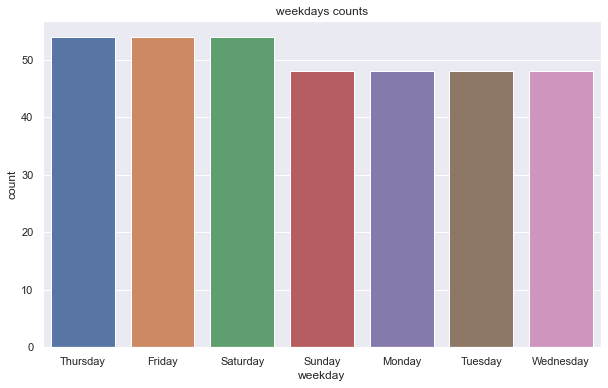

In [173]:
plt.figure(figsize=(10,6))
plt.title('weekdays counts')
sns.countplot(data=df,x='weekday')

In [174]:
df

,dispatching_base_number,date,active_vehicles,trips,month,weekday
0,B02512,2015-01-01,190,1132,1,Thursday
1,B02765,2015-01-01,225,1765,1,Thursday
2,B02764,2015-01-01,3427,29421,1,Thursday
3,B02682,2015-01-01,945,7679,1,Thursday
4,B02617,2015-01-01,1228,9537,1,Thursday
...,...,...,...,...,...,...
349,B02764,2015-02-28,3952,39812,2,Saturday
350,B02617,2015-02-28,1372,14022,2,Saturday
351,B02682,2015-02-28,1386,14472,2,Saturday
352,B02512,2015-02-28,230,1803,2,Saturday


In [175]:
df['year']=df['date'].dt.year
df['day']=df['date'].dt.day
df

,dispatching_base_number,date,active_vehicles,trips,month,weekday,year,day
0,B02512,2015-01-01,190,1132,1,Thursday,2015,1
1,B02765,2015-01-01,225,1765,1,Thursday,2015,1
2,B02764,2015-01-01,3427,29421,1,Thursday,2015,1
3,B02682,2015-01-01,945,7679,1,Thursday,2015,1
4,B02617,2015-01-01,1228,9537,1,Thursday,2015,1
...,...,...,...,...,...,...,...,...
349,B02764,2015-02-28,3952,39812,2,Saturday,2015,28
350,B02617,2015-02-28,1372,14022,2,Saturday,2015,28
351,B02682,2015-02-28,1386,14472,2,Saturday,2015,28
352,B02512,2015-02-28,230,1803,2,Saturday,2015,28


Analysis of all trips by base_dispatch_number,month,weekday

In [187]:
new_df=df.groupby(['dispatching_base_number','month','weekday'])['trips'].sum()
new_df=pd.DataFrame(new_df).reset_index()
new_df

,dispatching_base_number,month,weekday,trips
0,B02512,1,Friday,7602
1,B02512,1,Monday,4408
2,B02512,1,Saturday,7515
3,B02512,1,Sunday,4606
4,B02512,1,Thursday,7778
...,...,...,...,...
79,B02765,2,Saturday,25191
80,B02765,2,Sunday,15829
81,B02765,2,Thursday,20811
82,B02765,2,Tuesday,17139


# Visualization of Uber Trips

Observing the active_vehicles and trips to visualize the productivity

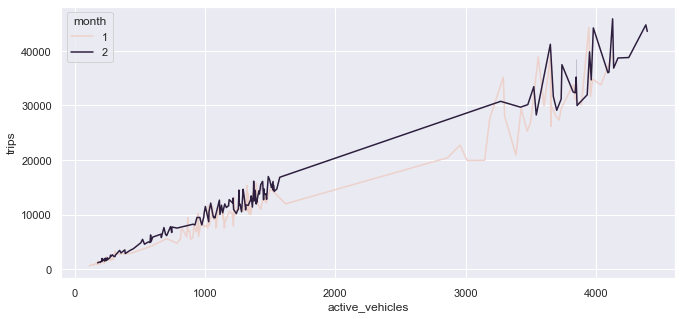

#Trips report by base dispatch number and weekdays

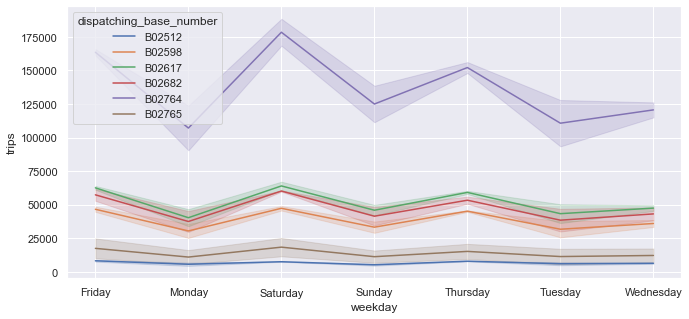

In [190]:
plt.figure(figsize=(11,5))
sns.lineplot(data=new_df,x='weekday',y='trips',hue='dispatching_base_number')
plt.show()

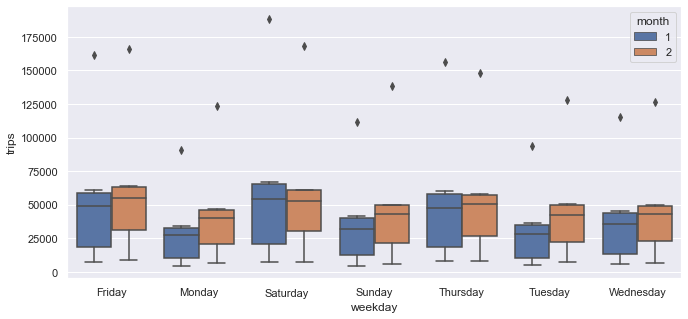

In [212]:
plt.figure(figsize=(11,5))
sns.boxplot(data=new_df,x='weekday',y='trips',hue='month')
plt.show()

In [92]:
df['year'].value_counts()

2015    354
Name: year, dtype: int64

<AxesSubplot:title={'center':'monthwise trips '}, xlabel='Jan-Feb data'>

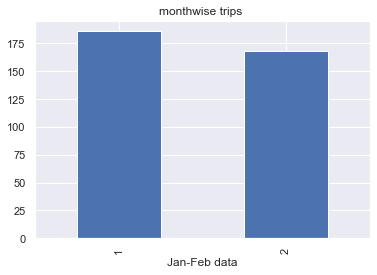

In [93]:

plt.title('monthwise trips ')
plt.xlabel('Jan-Feb data')
df['month'].value_counts().plot(kind='bar')

In [94]:
df['weekday'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [95]:
df['month'].unique()

array([1, 2], dtype=int64)

<AxesSubplot:xlabel='weekday', ylabel='count'>

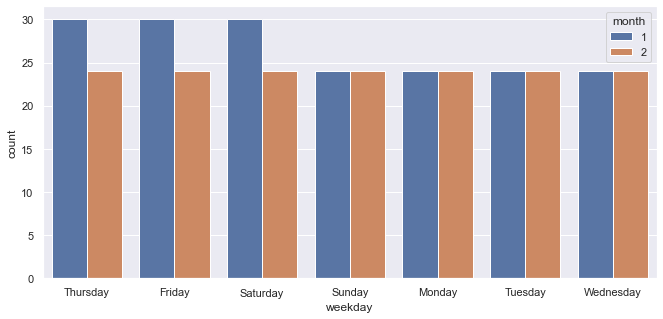

In [96]:
plt.figure(figsize=(11,5))
sns.countplot(data=df,x='weekday',hue='month')


# Denisty Of Trips 

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


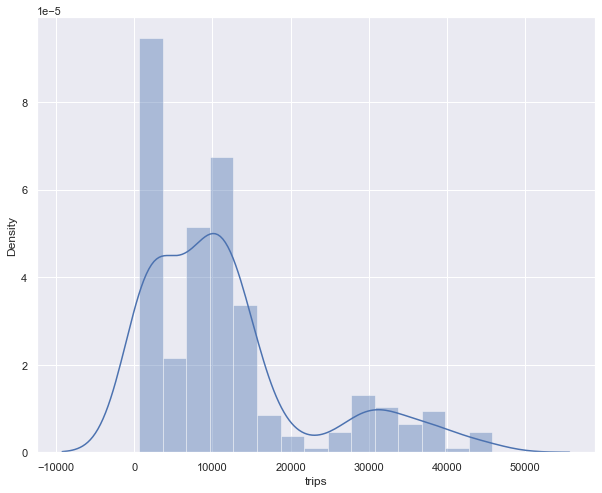

In [97]:
plt.figure(figsize=(10,8))
sns.distplot(df['trips'])
plt.show()

In [98]:
df['day'].value_counts()

1     12
2     12
28    12
27    12
26    12
25    12
24    12
23    12
22    12
21    12
20    12
19    12
18    12
17    12
16    12
15    12
14    12
13    12
12    12
11    12
10    12
9     12
8     12
7     12
6     12
5     12
4     12
3     12
29     6
30     6
31     6
Name: day, dtype: int64

<AxesSubplot:title={'center':'Day wise '}, xlabel='day', ylabel='count'>

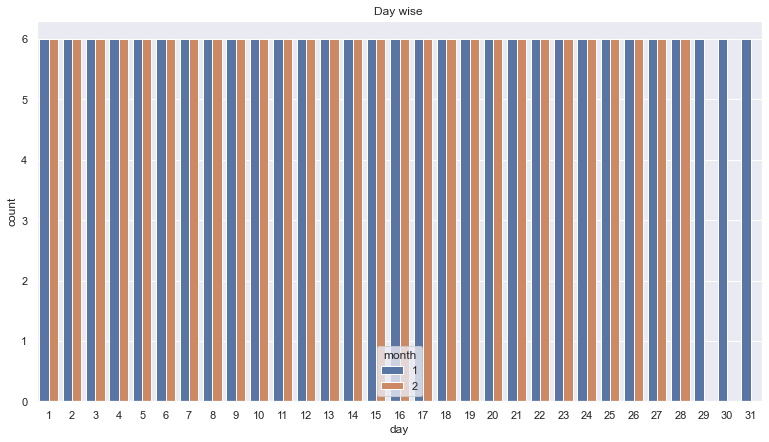

In [103]:
plt.figure(figsize=(13,7))
plt.title('Day wise ')
sns.countplot(data=df,x=df['day'],hue='month')

In [104]:
#month having highest trips
trips_=df.groupby('month')['trips'].sum()
trips_

month
1    1908649
2    2221581
Name: trips, dtype: int64

In [105]:
trips_.index

Int64Index([1, 2], dtype='int64', name='month')

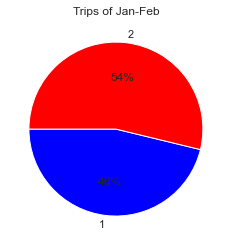

In [106]:
#Which month has the hisghest trips?
inside=(trips_.values/trips_.values.sum())*100
labels=trips_.index
plt.title('Trips of Jan-Feb')
colors=['blue','red']
plt.pie(inside,labels=labels,colors=colors,autopct='%0.0f%%', startangle = 180)
plt.show()

In [107]:
# January has 31 days trips and frebuary has 28 days trips , but still frebuary 
# trips are more than of january.

In [110]:
#Which weekday is the busiest week?
# Lets  see which weekday has maximum trips
weekday_trips=df.groupby('weekday',sort=False)['trips'].sum()
weekday_trips

weekday
Thursday     665647
Friday       711192
Saturday     751325
Sunday       523943
Monday       463799
Tuesday      483061
Wednesday    531263
Name: trips, dtype: int64

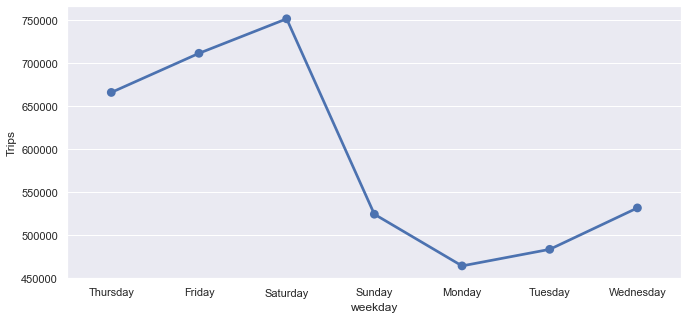

In [117]:
#Which 
plt.figure(figsize=(11,5))
sns.set_style('whitegrid')
sns.set_theme('notebook')
plt.ylabel('Trips')
sns.pointplot(data=df,x=weekday_trips.index,y=weekday_trips.values)
plt.show()

In [184]:
# From this above graph we conclude that, saturday having the most number of trips 751325, and monday  
# has the least number of trips.

In [119]:
df.head()

,dispatching_base_number,date,active_vehicles,trips,month,weekday,year,day
0,B02512,2015-01-01,190,1132,1,Thursday,2015,1
1,B02765,2015-01-01,225,1765,1,Thursday,2015,1
2,B02764,2015-01-01,3427,29421,1,Thursday,2015,1
3,B02682,2015-01-01,945,7679,1,Thursday,2015,1
4,B02617,2015-01-01,1228,9537,1,Thursday,2015,1


In [120]:
df['dispatching_base_number'].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

In [121]:
df['dispatching_base_number'].value_counts()

B02512    59
B02765    59
B02764    59
B02682    59
B02617    59
B02598    59
Name: dispatching_base_number, dtype: int64

In [122]:
#which basenumber has done the maximum trips?
baseno_trips=df.groupby('dispatching_base_number')['trips'].sum()
data=pd.DataFrame(baseno_trips,columns=['trips']).reset_index()
data

,dispatching_base_number,trips
0,B02512,93786
1,B02598,540791
2,B02617,725025
3,B02682,662509
4,B02764,1914449
5,B02765,193670


<AxesSubplot:xlabel='dispatching_base_number', ylabel='trips'>

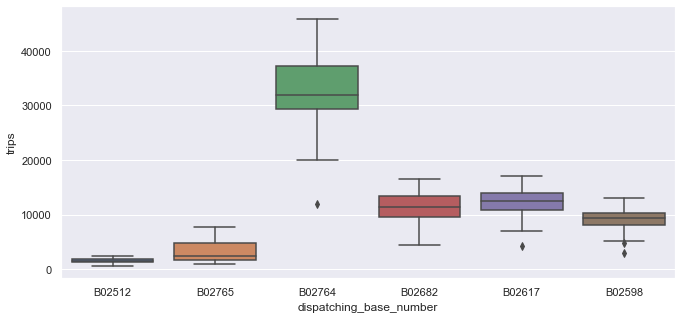

In [123]:
#Base number having highest number of trips 
plt.figure(figsize=(11,5))
sns.boxplot(data=df,x='dispatching_base_number',y='trips')

In [124]:
#monthwise active vehicles
df.groupby('month')['active_vehicles'].sum()

month
1    226335
2    236497
Name: active_vehicles, dtype: int64

In [126]:
weekday_av=df.groupby('weekday',sort=False)['active_vehicles'].sum()
weekday_av

weekday
Thursday     75820
Friday       77451
Saturday     71787
Sunday       56596
Monday       57242
Tuesday      58908
Wednesday    65028
Name: active_vehicles, dtype: int64

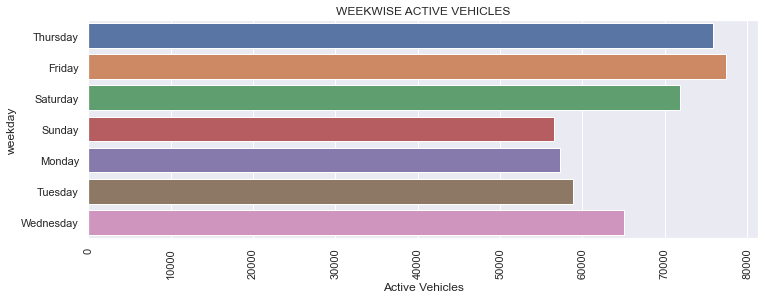

In [130]:
plt.figure(figsize=(12,4))
plt.title('WEEKWISE ACTIVE VEHICLES')
plt.xlabel('Active Vehicles')
plt.xticks(rotation=90)
sns.set_style('white')
sns.set_theme('notebook')
sns.barplot(data=df,x=weekday_av.values,y=weekday_av.index)
plt.show()

# Heatmaps

In [266]:
def count_rows(row):
    return len(row)


def heatmap(col1,col2):
    by_cross = df.groupby([col1,col2]).apply(count_rows)
    plt.figure(figsize=(12,8))
    sns.heatmap(by_cross.unstack())

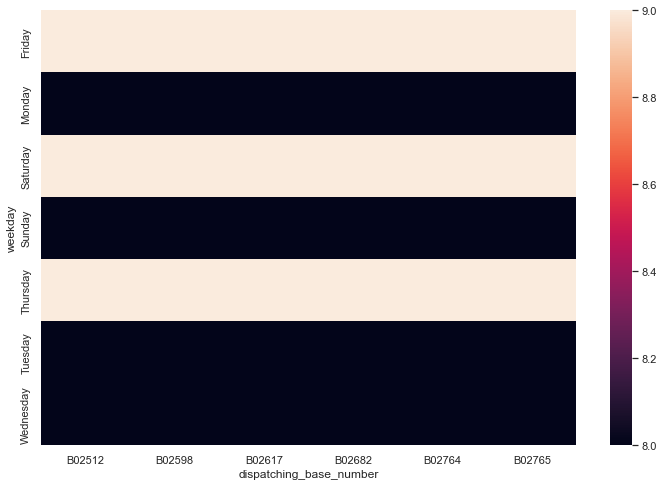

In [300]:
heatmap('weekday','dispatching_base_number')

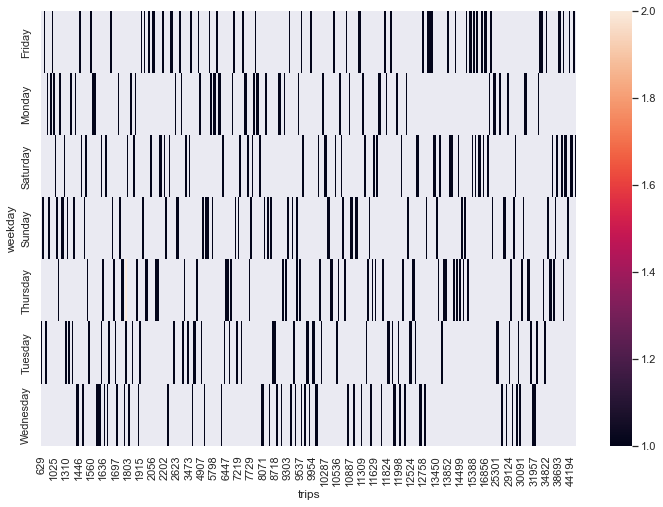

In [295]:
#base with number of trips 
heatmap('weekday','trips')

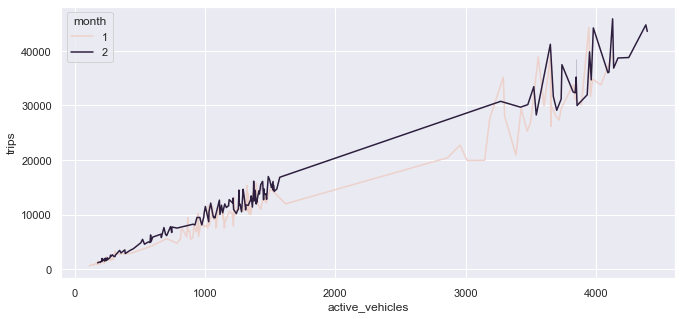

In [283]:
#trips with active vehicles 
plt.figure(figsize=(11,5))
sns.lineplot(data=df,x='active_vehicles',y='trips',hue='month')
plt.show()

In [284]:
av=df.groupby('dispatching_base_number')['active_vehicles'].sum()
av

dispatching_base_number
B02512     13125
B02598     58653
B02617     79758
B02682     71431
B02764    217290
B02765     22575
Name: active_vehicles, dtype: int64

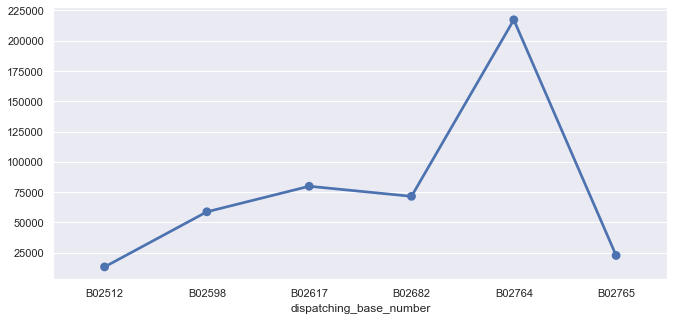

In [290]:
#base number with active vehicles of the same base number
plt.figure(figsize=(11,5))
sns.set_style('whitegrid')
sns.set_theme('notebook')
sns.pointplot(data=df,x=av.index,y=av.values)
plt.show()

In [304]:
#Analysis of day having Maximum trips
df.iloc[df['trips'].idxmax()]

dispatching_base_number                 B02764
date                       2015-02-14 00:00:00
active_vehicles                           4129
trips                                    45858
month                                        2
weekday                               Saturday
year                                      2015
day                                         14
Name: 264, dtype: object

In [305]:
df.iloc[df['trips'].idxmin()]

dispatching_base_number                 B02512
date                       2015-01-27 00:00:00
active_vehicles                            112
trips                                      629
month                                        1
weekday                                Tuesday
year                                      2015
day                                         27
Name: 160, dtype: object

# Demand vs Supply Chart

<Figure size 1080x360 with 0 Axes>

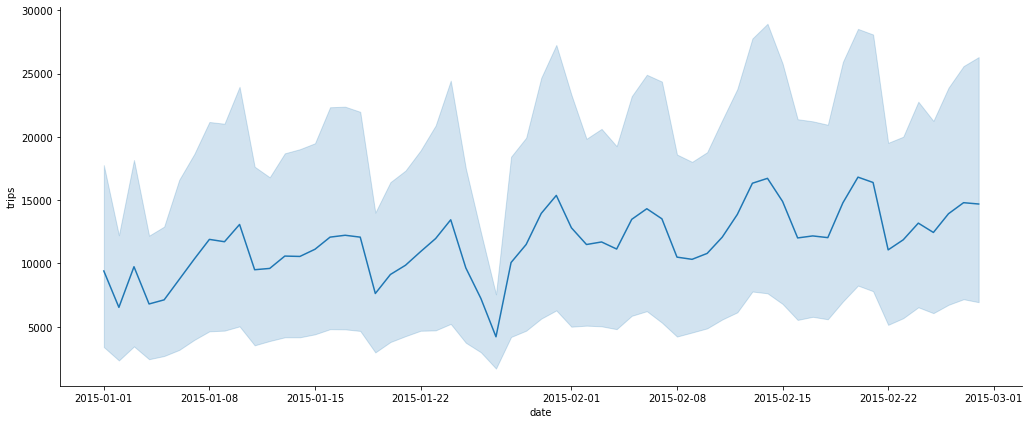

In [74]:
plt.figure(figsize=(15,5))
sns.relplot(data=df,x='date',y='trips',kind='line',height=6,aspect=2.4)
plt.show()